In [1]:
import sys
sys.path.append("../")

In [2]:
from ldds.base import compute_lagrangian_descriptor, fit_pes
from ldds.tools import draw_all_lds
from ldds.vector_fields import HenonHeiles_vector_field
from ldds.hamiltonians import HenonHeiles_potential
from ldds.testing_scripts import generate_pes_data

# Discretised Hénon-Heiles

_Energy_

\begin{equation*}
H(x, p_x) = K + V = \frac{1}{2} (p_x^2 + p_y^2) + x^2 y - \frac{1}{3} y^3
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} =  p_x \\
 \dot{y} &= \frac{\partial H}{\partial p_y} = p_y  \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} =  -x - 2 x y \\
 \dot{p}_y &= -\frac{\partial H}{\partial y} =  -x^2 -y + y^2 \\
 \end{align*}

In [3]:
import numpy as np

# Integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1/5 # Energy

ax1_min,ax1_max = [-0.6, 1.2]
ax2_min,ax2_max = [-0.65, 0.65]
N1, N2 = [100, 100]

# Box escape condition
box_boundaries = [[-5, 5], [-5, 5]]

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x1 x2 y1 y2)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [4]:
n=100
x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, n)

generate_pes_data([x,y], HenonHeiles_potential, 'HenonHeiles_pes_data')
discretised_HH_potential = fit_pes('HenonHeiles_pes_data')

OSError: Unable to create file (unable to open file: name = 'ldds/pes_files/HenonHeiles_pes_data.hdf5', errno = 2, error message = 'No such file or directory', flags = 13, o_flags = 242)

In [28]:
potential_energy = discretised_HH_potential
vector_field = HenonHeiles_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

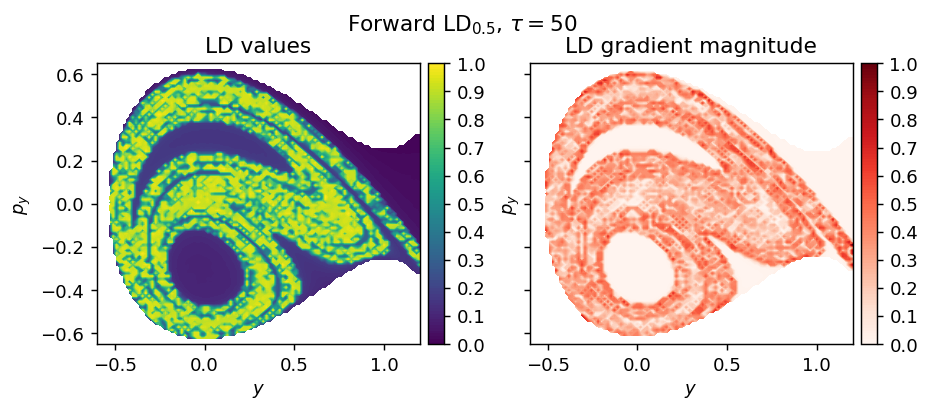

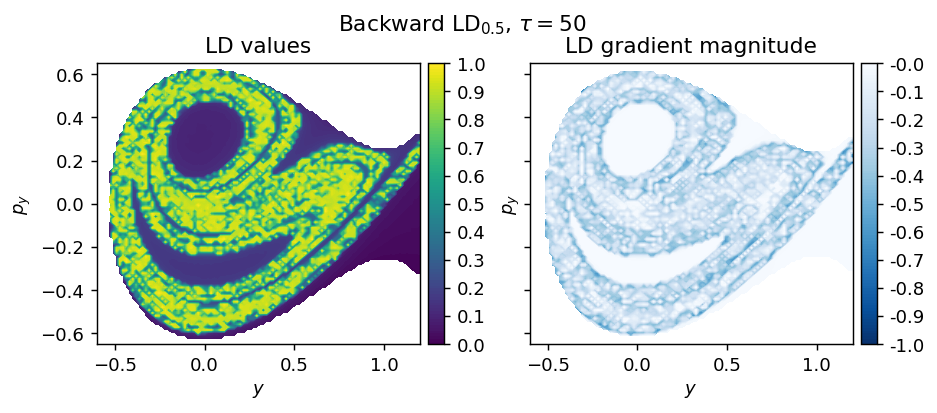

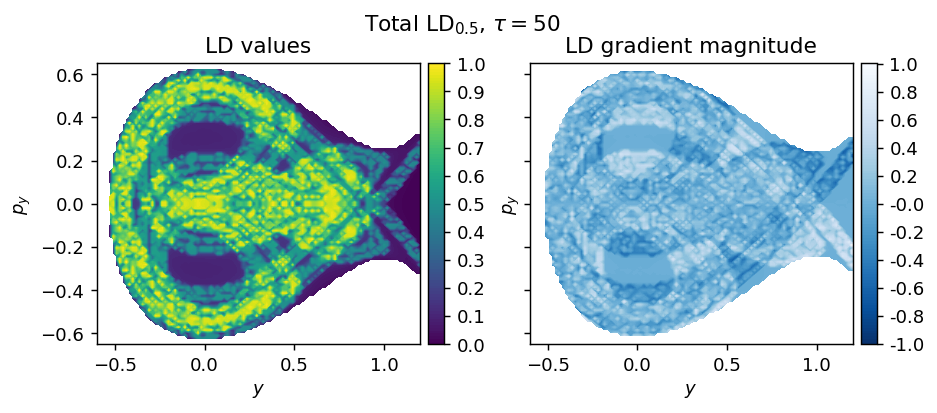

In [29]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)